In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

/home/jwill96/miniforge/envs/climate/lib/python3.12/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
ds = xr.open_dataset('https://pubargo.jamstec.go.jp/argo_product/dodsC/MOAA_GPV/Glb_PRS/OI/TS/TS_202405_GLB.nc')

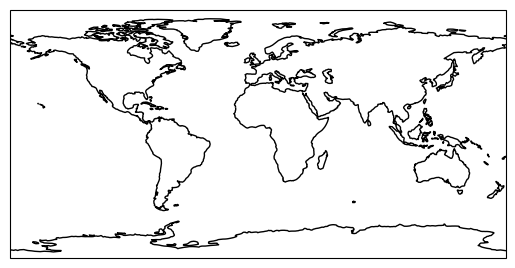

In [4]:
#Make an empty plot with default projection and coastlines
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

<function matplotlib.pyplot.imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'>

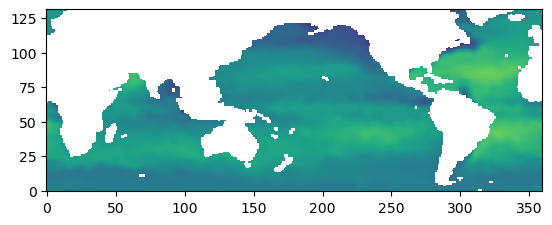

In [5]:
plt.imshow(ds['SOI'].sel(PRES=10.0, method = 'nearest'), origin ='lower')
plt.imshow

In [6]:
src_url = 'https://pubargo.jamstec.go.jp/argo_product/dodsC/MOAA_GPV/Glb_PRS/OI/TS/' 
year = '2023'
months = ['01', '02', '03','04', '05', '06', '07', '08', '09','10', '11', '12']

In [7]:
ds_list =[]

for i in months:
    date = year + i
    filename = 'TS_' + year + i + '_GLB.nc'
    
    print(filename)
    dl_link = src_url + filename
    
    ds = xr.open_dataset(dl_link)
    ds_list.append(ds)

TS_202301_GLB.nc
TS_202302_GLB.nc
TS_202303_GLB.nc
TS_202304_GLB.nc
TS_202305_GLB.nc
TS_202306_GLB.nc
TS_202307_GLB.nc
TS_202308_GLB.nc
TS_202309_GLB.nc
TS_202310_GLB.nc
TS_202311_GLB.nc
TS_202312_GLB.nc


In [8]:
len(ds_list)

12

In [9]:
ds0 = ds_list[0]
#ds_list

<function matplotlib.pyplot.imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'>

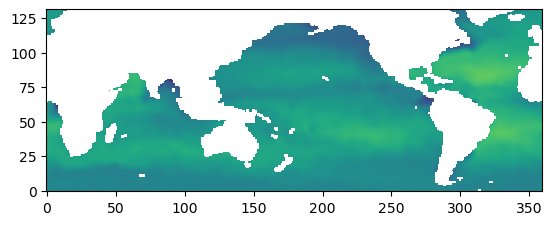

In [10]:
plt.imshow(ds0['SOI'].sel(PRES=10.0, method = 'nearest'), origin ='lower')
plt.imshow

In [11]:
ds0 = ds_list[0]
ds1 = ds_list[1]
ds2 = ds_list[2]
ds3 = ds_list[3]
ds4 = ds_list[4]
ds5 = ds_list[5]
ds6 = ds_list[6]
ds7 = ds_list[7]
ds8 = ds_list[8]
ds9 = ds_list[9]
ds10 = ds_list[10]
ds11 = ds_list[11]

In [12]:
ds0 = ds0.sortby(ds0['LONGITUDE'])
ds1 = ds1.sortby(ds1['LONGITUDE'])
ds2 = ds2.sortby(ds2['LONGITUDE'])
ds3 = ds3.sortby(ds3['LONGITUDE'])
ds4 = ds4.sortby(ds4['LONGITUDE'])
ds5 = ds5.sortby(ds5['LONGITUDE'])
ds6 = ds6.sortby(ds6['LONGITUDE'])
ds7 = ds7.sortby(ds7['LONGITUDE'])
ds8 = ds8.sortby(ds8['LONGITUDE'])
ds9 = ds9.sortby(ds9['LONGITUDE'])
ds10 = ds10.sortby(ds10['LONGITUDE'])
ds11 = ds11.sortby(ds11['LONGITUDE'])
ds0

<xarray.Dataset> Size: 19MB
Dimensions:             (LONGITUDE: 360, LATITUDE: 132, PRES: 25)
Coordinates:
  * LONGITUDE           (LONGITUDE) float32 1kB -179.5 -178.5 ... 178.5 179.5
  * LATITUDE            (LATITUDE) float32 528B -60.5 -59.5 -58.5 ... 69.5 70.5
  * PRES                (PRES) float32 100B 10.0 20.0 30.0 ... 1.75e+03 2e+03
Data variables:
    DATE_GDAC_DOWNLOAD  object 8B ...
    DATE_UPDATE         object 8B ...
    DATASET_TYPE        object 8B ...
    TOI                 (PRES, LATITUDE, LONGITUDE) float32 5MB ...
    TOI_ERR             (PRES, LATITUDE, LONGITUDE) float32 5MB ...
    SOI                 (PRES, LATITUDE, LONGITUDE) float32 5MB ...
    SOI_ERR             (PRES, LATITUDE, LONGITUDE) float32 5MB ...
Attributes:
    Conventions:   COARDS
    Title:         Argo OI TS 2023JAN Global ocean
    Version:       Created Feb.23,2023 by JAMSTEC/ArgoGroup
    DODS.strlen:   4
    DODS.dimName:  STRING4

In [36]:
ds_list = [ds0, ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9, ds10, ds11]
#ds_list

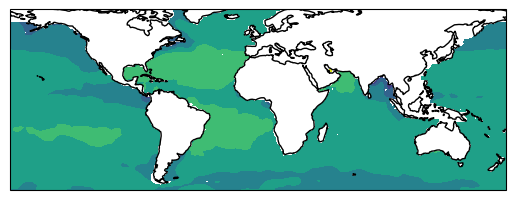

In [14]:
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={'projection': proj})
soi = ds11.sel(PRES=ds11.PRES.values[0])['SOI']
ax.contourf  (soi['LONGITUDE'], soi['LATITUDE'], soi)
ax.coastlines()


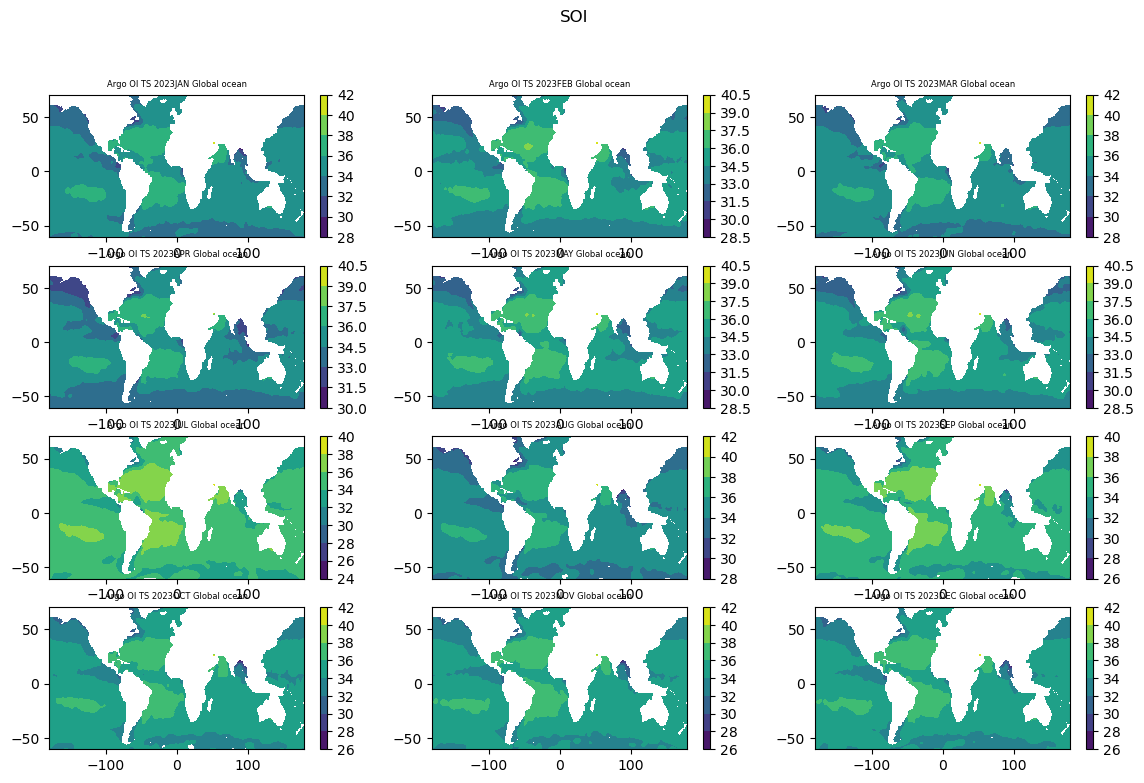

In [56]:
fig = plt.figure(figsize=(14,8.5)) ## scale is in inches
clevs=np.arange(28.5,40.5,.5) ##  values on the bar, can make the bins smaller with the third value

for i, month in enumerate(ds_list):
    plt.subplot(4,3,i+1)
    ds_soi = ds_list[i].sel(PRES=ds_list[i].PRES.values[0])['SOI']
    plt.contourf (ds_soi['LONGITUDE'], ds_soi['LATITUDE'], ds_soi)
    plt.colorbar() #some of the plots have different colorbars
    plt.title(ds_list[i].Title, fontsize = 6)
    plt.suptitle('SOI')

(12,)


Text(0.5, 0.98, 'SOI')

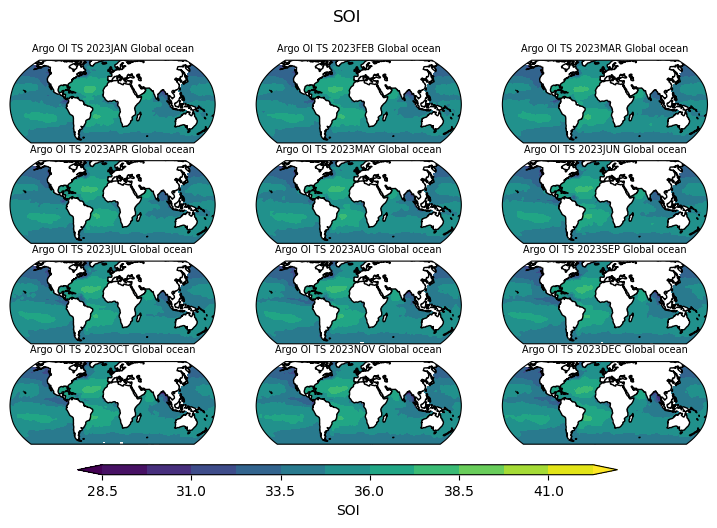

In [73]:
clevs=np.arange(28.5,42.5,1.25) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=4,ncols=3, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,5))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds_list):
    
    ds_soi = ds_list[i].sel(PRES=ds_list[i].PRES.values[0])['SOI']
   
    ds_soi,lons=add_cyclic_point(ds_soi,coord=ds_list[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds_list[i]['LATITUDE'],ds_soi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
        
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
   # Title each subplot with the name of the model
    axs[i].set_title(ds_list[i].Title, fontsize=7)
    

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='SOI') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SOI')

(12,)


Text(0.5, 0.98, 'SOI')

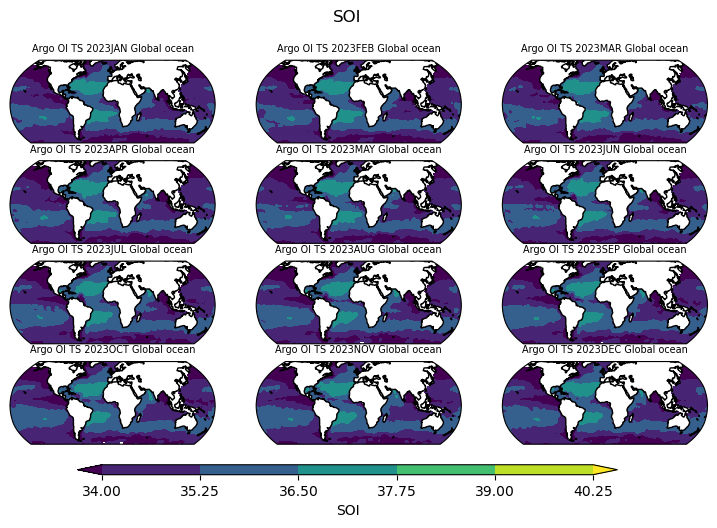

In [66]:
clevs=np.arange(34,40.5,1.25) ##  values on the bar, can make the bins smaller with the third value
fig, axs = plt.subplots(nrows=4,ncols=3, #subplots creates all the subplots you want in a single function
                        subplot_kw={'projection': ccrs.Robinson()}, #Robinson projection
                        figsize=(9,5))
axs=axs.flatten()
print(axs.shape)

for i, month in enumerate(ds_list):
    
    ds_soi = ds_list[i].sel(PRES=ds_list[i].PRES.values[0])['SOI']
   
    ds_soi,lons=add_cyclic_point(ds_soi,coord=ds_list[i]['LONGITUDE'])

    # Contour plot
    cs=axs[i].contourf(lons,ds_list[i]['LATITUDE'],ds_soi,clevs,
                          transform = ccrs.PlateCarree(),extend='both')
    
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
   # Title each subplot with the name of the model
    axs[i].set_title(ds_list[i].Title, fontsize=7)

    
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02]) #.2 is 20% from the left side, 0.175 is 17.5% from the bottom, 
#0.6 is 60% of the total width of the color bar in comparison to the length of the box and 0.02 is 
#2% which is the space for the height of the colorbar

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='SOI') #label = '\u00b0C' gives you the degrees symbol
    

plt.suptitle('SOI')